# Final Project 
<b> Dito Rahmad Y W

<b>Pada Penelitian ini menggunakan sumber data tentang gejala penyakit jantung, dan pada penelitian ini untuk menentunkan 
<b> apakah orang tersebut memiliki gejala penyakit jantung atau tidak dengan paramater, detak jantung, tekanan darah, dsb.
<b>
<b> Sumber data: <a href="https://archive.ics.uci.edu/ml/datasets/Heart+Disease">Disini</a>

# Membaca Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("F:\\dtsbd\\Final Project\\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Keterangan Kolom; <br>

* age - Umur dalam Tahun <br>
* sex - jenis kelamin (1 = Pria; 0 = Wanita) <br>
* cp - jenis nyeri dada <br>
* trestbps - tekanan darah (dalam mm Hg saat pemeriksaan awal) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - detak jantung maksimal <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - terdapat gejala atau tidak (1=ya, 0=tidak)

# Deskripsi data

In [2]:
df.target.value_counts()

#untuk melihat jumlah pasien yang memiliki gejala penyakit dan yang tidak

1    165
0    138
Name: target, dtype: int64

In [27]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Persentase pasien yang tidak memiliki gejala: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Persentase pasien yang memiliki gejala: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Persentase pasien yang tidak memiliki gejala: 45.54%
Persentase pasien yang memiliki gejala: 54.46%


In [28]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Persentase pasien Wanita: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Persentase pasien Pria: {:.2f}%".format((countMale / (len(df.sex))*100)))

Persentase pasien Wanita: 31.68%
Persentase pasien Pria: 68.32%


In [5]:
#df.groupby('target').mean()
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


dari tabel diatas didapatkan nilai mean, std, min, max dari tiap kolom di datasheet

# Plotting scatter
<b>setelah deskripsi data sudah didapatkan maka langkah selanjutnya adalah menampilkan plotting scatter data.
<b>jadi pada plotting pertama, kita dapat melihat bagaimana sebaran data pasien yang terjangkit gejala atau tidak, berdasarkan
<b> Umur dan Frekuensi detak jantung.

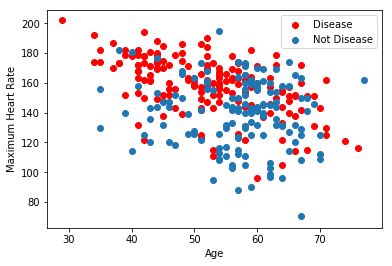

In [6]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

<b>Selanjutnya pada plotting Kedua, kita dapat melihat bagaimana sebaran data pasien yang terjangkit gejala atau tidak (Target), berdasarkan Tekanan darah dan Frekuensi detak jantung.

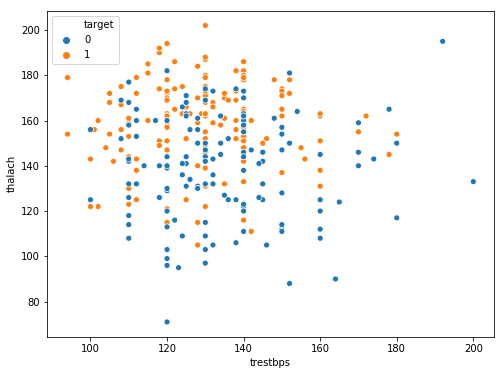

In [7]:
# Tekanan darah dan detak jantung tiap menit
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df,hue='target')
plt.show()

## Membuat Model Regresi Logistik
<br>
saya disini menggunakan model regresi logistik karena data yang akan dianalisa adalah hanya memiliki 2 macam yaitu 0 dan 1 / Ya dan tidak dan selanjutnya akan dibandingkan dengan menggunakan library scikitlearn dari python sebagai perbandingan tingkat akurasinya.

In [8]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

### Normalisasi Data
<br>
<br>
<img src="https://beyondbacktesting.files.wordpress.com/2017/07/normalization.png?w=863" width="400px"/>

In [9]:
# normalisasi
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

Kami akan membagi data kami. 80% dari data kami akan menjadi data latih dan 20% dari itu akan menjadi data uji.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [11]:

x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

dimisalkan weight = 0.01 dan bias = 0.0

In [12]:

def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

### Sigmoid Function
<br>
<img src="https://qph.fs.quoracdn.net/main-qimg-05edc1873d0103e36064862a45566dba" width="500px"/>

In [13]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

By the way in formulas; <br>
* h0(x^i)= y_head
* y^i = y_train
* x^i = x_train

untuk proses analisis manual menggunakan metode foward Backward , cost function, dan Gradient Descent untuk mengetahui tingkat akurasi dari logistic regression

In [14]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [15]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #for each iteration, update weight and bias values
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [16]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [29]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension = x_train.shape[0]
    weight,bias = initialize(dimension)
    
    parameters, gradients = update(weight,bias,x_train,y_train,learningRate,iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Tingkat Akurasi: {:.2f}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

iteration: 100
cost: 0.37966533849933537


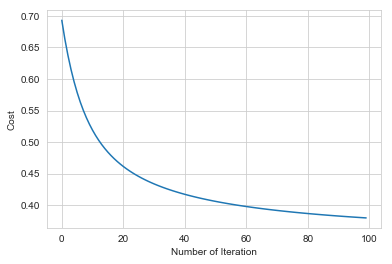

Tingkat Akurasi: 81.97%


In [30]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

maksud dari hasil grafik diatas adalah perbandingan 100 kali percobaan/iterasi yang dilakukan dengan cost, dan hasilnya sudah terdapat penurunan pada saat iterasi ke 20. maka dari itu bisa juga didapatkan tingkat akurasi sebesar 81,97%.

## Membandingkan dengan scikitlearn di python

In [19]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.25%


F:\program files\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


dari hasil model logistic regression di tools scikitlearn di python didapatkan tingkat akurasi 85.25%

# Analisis dengan beberapa model Classification

## K-Nearest Neighbour (KNN) Classification

In [20]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 83.61%


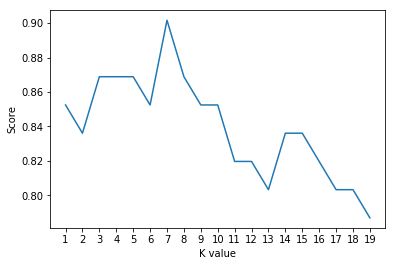

Maximum KNN Score is 90.16%


In [21]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [22]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 81.97%


F:\program files\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 85.25%


In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 73.77%


In [25]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 85.25%


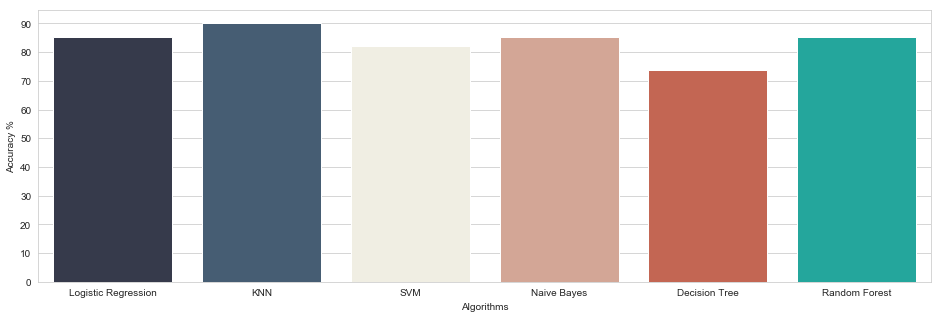

In [31]:
colors = ["#33384E", "#3E5D7A", "#F2F0E1", "#DDA18C","#D65A40","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

# Kesimpulan
<b>
<b> Jadi dapat disimpulkan bahwa hasil analisis dataset ini dengan berbagai metode analisis klasifikasi adalah: 
<br> Logistic Regression : 81.97%
<br> KNN : 83.61%
<br> SVM : 81.97%
<br> Naive Bayes : 85.25%
<br> Decision Tree : 73.77%
<br> Random Forest : 85.25%